1. 导入并预处理数据
开始时间：2024-12-30 21:39:19.538598
数据数量：300，异常数据数量：0，结束时间：2024-12-30 21:39:19.822083

数据拆分
计算词频2024-12-30 21:39:19.856613
词频矩阵维度：(240, 111170)
结束时间：2024-12-30 21:39:20.988671

计算 TF-IDF2024-12-30 21:39:20.988671
训练集 TF-IDF 矩阵维度：(240, 111170)
测试集 TF-IDF 矩阵维度：(60, 111170)

结束时间：2024-12-30 21:39:22.273558
2. 评估算法
开始时间：2024-12-30 21:39:22.287389
LR 算法2024-12-30 21:39:22.292502
LR : 0.3083 (0.1041)，结束时间：2024-12-30 21:39:44.119649
SVM 算法2024-12-30 21:39:44.119649
SVM : 0.0458 (0.0346)，结束时间：2024-12-30 21:39:53.871372
CART 算法2024-12-30 21:39:53.872372
CART : 0.2750 (0.1210)，结束时间：2024-12-30 21:40:05.166655
MNB 算法2024-12-30 21:40:05.167655
MNB : 0.2083 (0.0745)，结束时间：2024-12-30 21:40:05.662381
KNN 算法2024-12-30 21:40:05.662381
KNN : 0.3875 (0.1264)，结束时间：2024-12-30 21:40:05.837253

结束时间：2024-12-30 21:40:05.837253
# 箱线图比较算法


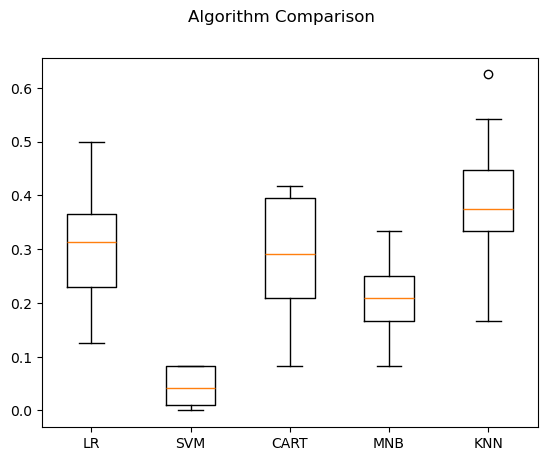

3. 算法调参
开始时间：2024-12-30 21:40:05.964735
LR 算法调参2024-12-30 21:40:05.964735
最优 : 0.4625 使用 {'C': 200}，结束时间：2024-12-30 21:43:12.818827

MNB 算法调参2024-12-30 21:43:12.818827
最优 : 0.5375 使用 {'alpha': 0.001}，结束时间：2024-12-30 21:43:14.437102

CART 算法调参2024-12-30 21:43:14.438101
最优 : 0.3208 使用 {'max_depth': 120}，结束时间：2024-12-30 21:44:11.743405

KNN 算法调参2024-12-30 21:44:11.743405
最优 : 0.4208 使用 {'n_neighbors': 9}，结束时间：2024-12-30 21:44:12.751337
4. 集成算法
开始时间：2024-12-30 21:44:12.752850
RF 算法2024-12-30 21:44:12.752850
RF : 0.3917 (0.0702)，结束时间：2024-12-30 21:44:39.881303
AB 算法2024-12-30 21:44:39.881303
AB : 0.1958 (0.0747)，结束时间：2024-12-30 21:46:01.365839

结束时间：2024-12-30 21:46:01.365839
# 箱线图比较算法


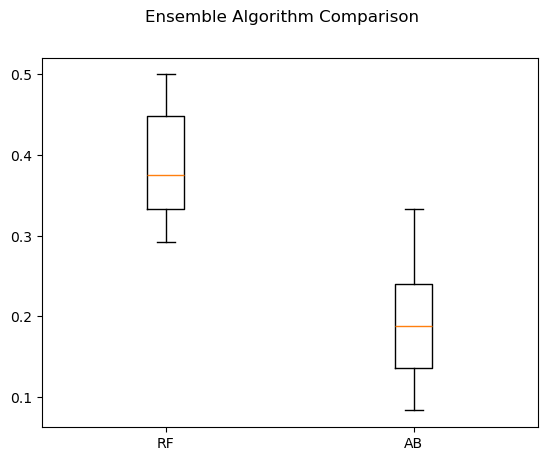

# 调参 RF
最优 : 0.4167 使用 {'n_estimators': 200}

结束时间：2024-12-30 21:47:08.308376
5. 选择最优算法，生成模型
算法评估2024-12-30 21:47:08.308376
准确率：0.48333333333333334
              precision    recall  f1-score   support

      animal       0.50      0.50      0.50         4
         car       1.00      0.50      0.67         4
   cinephile       0.75      0.60      0.67         5
       dance       0.40      0.50      0.44         4
       douga       0.50      0.25      0.33         4
         ent       0.00      0.00      0.00         2
     fashion       0.25      0.50      0.33         2
        food       0.75      0.75      0.75         4
        game       0.50      0.43      0.46         7
     kichiku       0.50      0.22      0.31         9
   knowledge       0.67      0.50      0.57         4
        life       0.25      0.33      0.29         3
       music       1.00      0.67      0.80         3
      sports       0.00      0.00      0.00         0
        tech       0.71      1.00      0.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings


def load_and_preprocess_data(file_path, test_size=0.2, random_state=42):
    """
    加载并预处理数据，将数据拆分为训练集和测试集
    :param file_path: 数据文件的路径
    :param test_size: 测试集的比例
    :param random_state: 随机状态，用于可重复性
    :return: 训练集和测试集的特征矩阵和标签
    """
    print("1. 导入并预处理数据")
    print("开始时间：" + str(pd.Timestamp.now()))
    df = pd.read_csv(file_path)
    # 检查数据是否合规，假设文本内容列名为 'text'，标签列名为 'label'
    err = 0
    for index, row in df.iterrows():
        if len(str(row['所有评论和弹幕'])) < 10:   
            err += 1  # 文本少于10个字视为异常
    print(f"数据数量：{len(df)}，异常数据数量：{err}，结束时间：{pd.Timestamp.now()}")
    print("")

    print("数据拆分")
    X = df['所有评论和弹幕']  # 假设文本数据在 '所有评论和弹幕' 列
    y = df['分区']  # 假设标签在 '分区' 列
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print("计算词频" + str(pd.Timestamp.now()))
    count_vect = CountVectorizer(stop_words='english', decode_error='ignore')
    X_train_counts = count_vect.fit_transform(X_train)
    print("词频矩阵维度：" + str(X_train_counts.shape))
    print("结束时间：" + str(pd.Timestamp.now()))
    print("")

    print("计算 TF-IDF" + str(pd.Timestamp.now()))
    tf_transformer = TfidfVectorizer(stop_words='english', decode_error='ignore')
    X_train_counts_tf = tf_transformer.fit_transform(X_train)
    X_test_counts_tf = tf_transformer.transform(X_test)  # 对测试集进行转换
    print("训练集 TF-IDF 矩阵维度：" + str(X_train_counts_tf.shape))
    print("测试集 TF-IDF 矩阵维度：" + str(X_test_counts_tf.shape))
    print("\n结束时间：" + str(pd.Timestamp.now()))
    return X_train_counts, X_train_counts_tf, X_test_counts_tf, y_train, y_test


def evaluate_algorithms(X_train_counts_tf, y_train):
    """
    评估不同的分类算法
    :param X_train_counts_tf: 训练数据的 TF-IDF 矩阵
    :param y_train: 训练集的标签
    :return: 算法评估结果
    """
    print("2. 评估算法")
    print("开始时间：" + str(pd.Timestamp.now()))
    num_folds = 10
    scoring = 'accuracy'
    models = {
        'LR': LogisticRegression(solver='lbfgs', multi_class='auto'),
        'SVM': SVC(gamma='auto'),
        'CART': DecisionTreeClassifier(),
        'MNB': MultinomialNB(),
        'KNN': KNeighborsClassifier()
    }
    results = []
    for key, model in models.items():
        print(key + " 算法" + str(pd.Timestamp.now()))
        kfold = KFold(n_splits=num_folds, shuffle=True)
        cv_results = cross_val_score(model, X_train_counts_tf, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        print(f"{key} : {cv_results.mean():.4f} ({cv_results.std():.4f})，结束时间：{pd.Timestamp.now()}")
    print("\n结束时间：" + str(pd.Timestamp.now()))
    # 箱线图比较算法
    print("# 箱线图比较算法")
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(models.keys())
    plt.show()
    return results


def tune_parameters(X_train_counts_tf, y_train):
    """
    对不同的分类算法进行参数调优
    :param X_train_counts_tf: 训练数据的 TF-IDF 矩阵
    :param y_train: 训练集的标签
    """
    print("3. 算法调参")
    print("开始时间：" + str(pd.Timestamp.now()))
    num_folds = 10
    scoring = 'accuracy'
    # 调参 LR
    print("LR 算法调参" + str(pd.Timestamp.now()))
    param_grid_lr = {'C': [13, 15, 20, 200]}
    model_lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
    grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring=scoring, cv=KFold(n_splits=num_folds, shuffle=True))
    grid_result_lr = grid_lr.fit(X_train_counts_tf, y_train)
    print(f"最优 : {grid_result_lr.best_score_:.4f} 使用 {grid_result_lr.best_params_}，结束时间：{pd.Timestamp.now()}")
    print("")
    # 调参 MNB
    print("MNB 算法调参" + str(pd.Timestamp.now()))
    param_grid_mnb = {'alpha': [0.001, 0.01, 0.1, 1.5]}
    model_mnb = MultinomialNB()
    grid_mnb = GridSearchCV(estimator=model_mnb, param_grid=param_grid_mnb, scoring=scoring, cv=KFold(n_splits=num_folds, shuffle=True))
    grid_result_mnb = grid_mnb.fit(X_train_counts_tf, y_train)
    print(f"最优 : {grid_result_mnb.best_score_:.4f} 使用 {grid_result_mnb.best_params_}，结束时间：{pd.Timestamp.now()}")
    print("")
    # 调参 CART
    print("CART 算法调参" + str(pd.Timestamp.now()))
    param_grid_cart = {'max_depth': [90, 100, 120, 150, 200]}
    model_cart = DecisionTreeClassifier(criterion='gini')
    grid_cart = GridSearchCV(estimator=model_cart, param_grid=param_grid_cart, scoring=scoring, cv=KFold(n_splits=num_folds, shuffle=True))
    grid_result_cart = grid_cart.fit(X_train_counts_tf, y_train)
    print(f"最优 : {grid_result_cart.best_score_:.4f} 使用 {grid_result_cart.best_params_}，结束时间：{pd.Timestamp.now()}")
    print("")
    # 调参 KNN
    print("KNN 算法调参" + str(pd.Timestamp.now()))
    param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
    model_knn = KNeighborsClassifier()
    grid_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, scoring=scoring, cv=KFold(n_splits=num_folds, shuffle=True))
    grid_result_knn = grid_knn.fit(X_train_counts_tf, y_train)
    print(f"最优 : {grid_result_knn.best_score_:.4f} 使用 {grid_result_knn.best_params_}，结束时间：{pd.Timestamp.now()}")


def evaluate_ensemble_algorithms(X_train_counts_tf, y_train):
    """
    评估集成算法
    :param X_train_counts_tf: 训练数据的 TF-IDF 矩阵
    :param y_train: 训练集的标签
    """
    print("4. 集成算法")
    print("开始时间：" + str(pd.Timestamp.now()))
    num_folds = 10
    scoring = 'accuracy'
    ensembles = {
        'RF': RandomForestClassifier(n_estimators=200),
        'AB': AdaBoostClassifier()
    }
    results = []
    for key, model in ensembles.items():
        print(key + " 算法" + str(pd.Timestamp.now()))
        kfold = KFold(n_splits=num_folds, shuffle=True)
        cv_results = cross_val_score(model, X_train_counts_tf, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        print(f"{key} : {cv_results.mean():.4f} ({cv_results.std():.4f})，结束时间：{pd.Timestamp.now()}")
    print("\n结束时间：" + str(pd.Timestamp.now()))
    # 箱线图比较算法
    print("# 箱线图比较算法")
    fig = plt.figure()
    fig.suptitle('Ensemble Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(ensembles.keys())
    plt.show()
    # 调参 RF
    print("# 调参 RF")
    param_grid = {'n_estimators': [10, 100, 150, 200]}
    model = RandomForestClassifier()
    kfold = KFold(n_splits=num_folds, shuffle=True)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train_counts_tf, y_train)
    print(f"最优 : {grid_result.best_score_:.4f} 使用 {grid_result.best_params_}")
    print("\n结束时间：" + str(pd.Timestamp.now()))


def main():
    # 过滤警告
    warnings.filterwarnings("ignore")
    file_path = './output_withdanmaku_csv.csv'
    X_train_counts, X_train_counts_tf, X_test_counts_tf, y_train, y_test = load_and_preprocess_data(file_path)
    evaluate_algorithms(X_train_counts_tf, y_train)
    tune_parameters(X_train_counts_tf, y_train)
    evaluate_ensemble_algorithms(X_train_counts_tf, y_train)
    # 选择最优算法，生成模型
    print("5. 选择最优算法，生成模型")
    print("算法评估" + str(pd.Timestamp.now()))
    model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, C=200)
    model.fit(X_train_counts_tf, y_train)
    predictions = model.predict(X_test_counts_tf)
    print("准确率：" + str(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    print("算法评估，结束时间：" + str(pd.Timestamp.now()))


if __name__ == "__main__":
    main()